In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve
import itertools
import time

In [2]:
df = pd.read_csv("Hotel Reservations.csv")

## Primary EDA 

Includes assessment of variable types, descriptive statistics, correlations, count plots of categorical predictors vs. response, box plots of continuous predictors vs. response. 

In [3]:
# Snapshot of data
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [4]:
# Variable types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [5]:
# Distributions of continuous variables
df.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_adults,36275.0,1.844962,0.518715,0.0,2.0,2.00,2.0,4.0
no_of_children,36275.0,0.105279,0.402648,0.0,0.0,0.00,0.0,10.0
no_of_weekend_nights,36275.0,0.810724,0.870644,0.0,0.0,1.00,2.0,7.0
no_of_week_nights,36275.0,2.204300,1.410905,0.0,1.0,2.00,3.0,17.0
required_car_parking_space,36275.0,0.030986,0.173281,0.0,0.0,0.00,0.0,1.0
lead_time,36275.0,85.232557,85.930817,0.0,17.0,57.00,126.0,443.0
arrival_year,36275.0,2017.820427,0.383836,2017.0,2018.0,2018.00,2018.0,2018.0
arrival_month,36275.0,7.423653,3.069894,1.0,5.0,8.00,10.0,12.0
arrival_date,36275.0,15.596995,8.740447,1.0,8.0,16.00,23.0,31.0
repeated_guest,36275.0,0.025637,0.158053,0.0,0.0,0.00,0.0,1.0


In [6]:
# Calculating number of missing variables
df.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

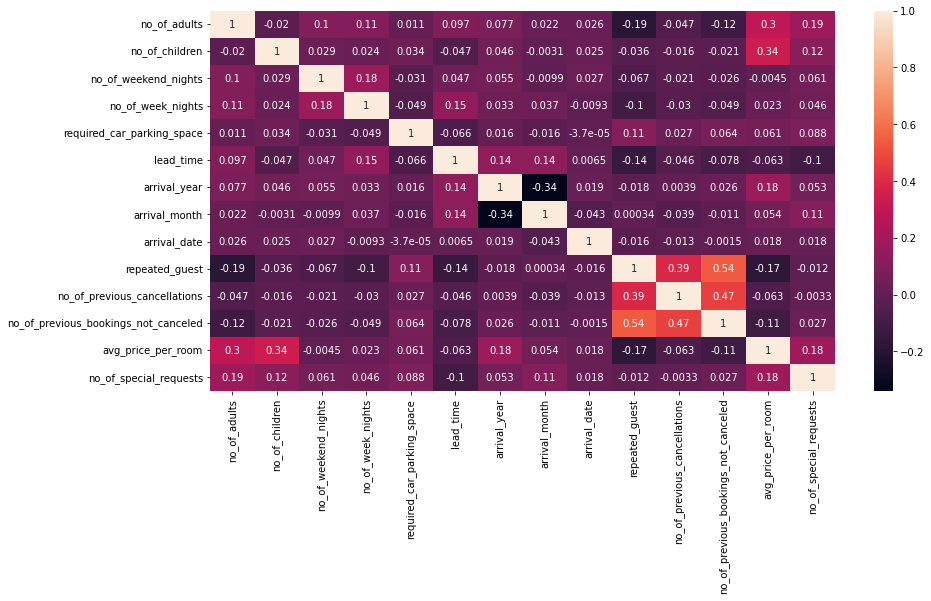

In [7]:
# Determining correlations between continuous predictors
plt.figure(figsize = (14,7));
sns.heatmap(df.corr(), annot = True);

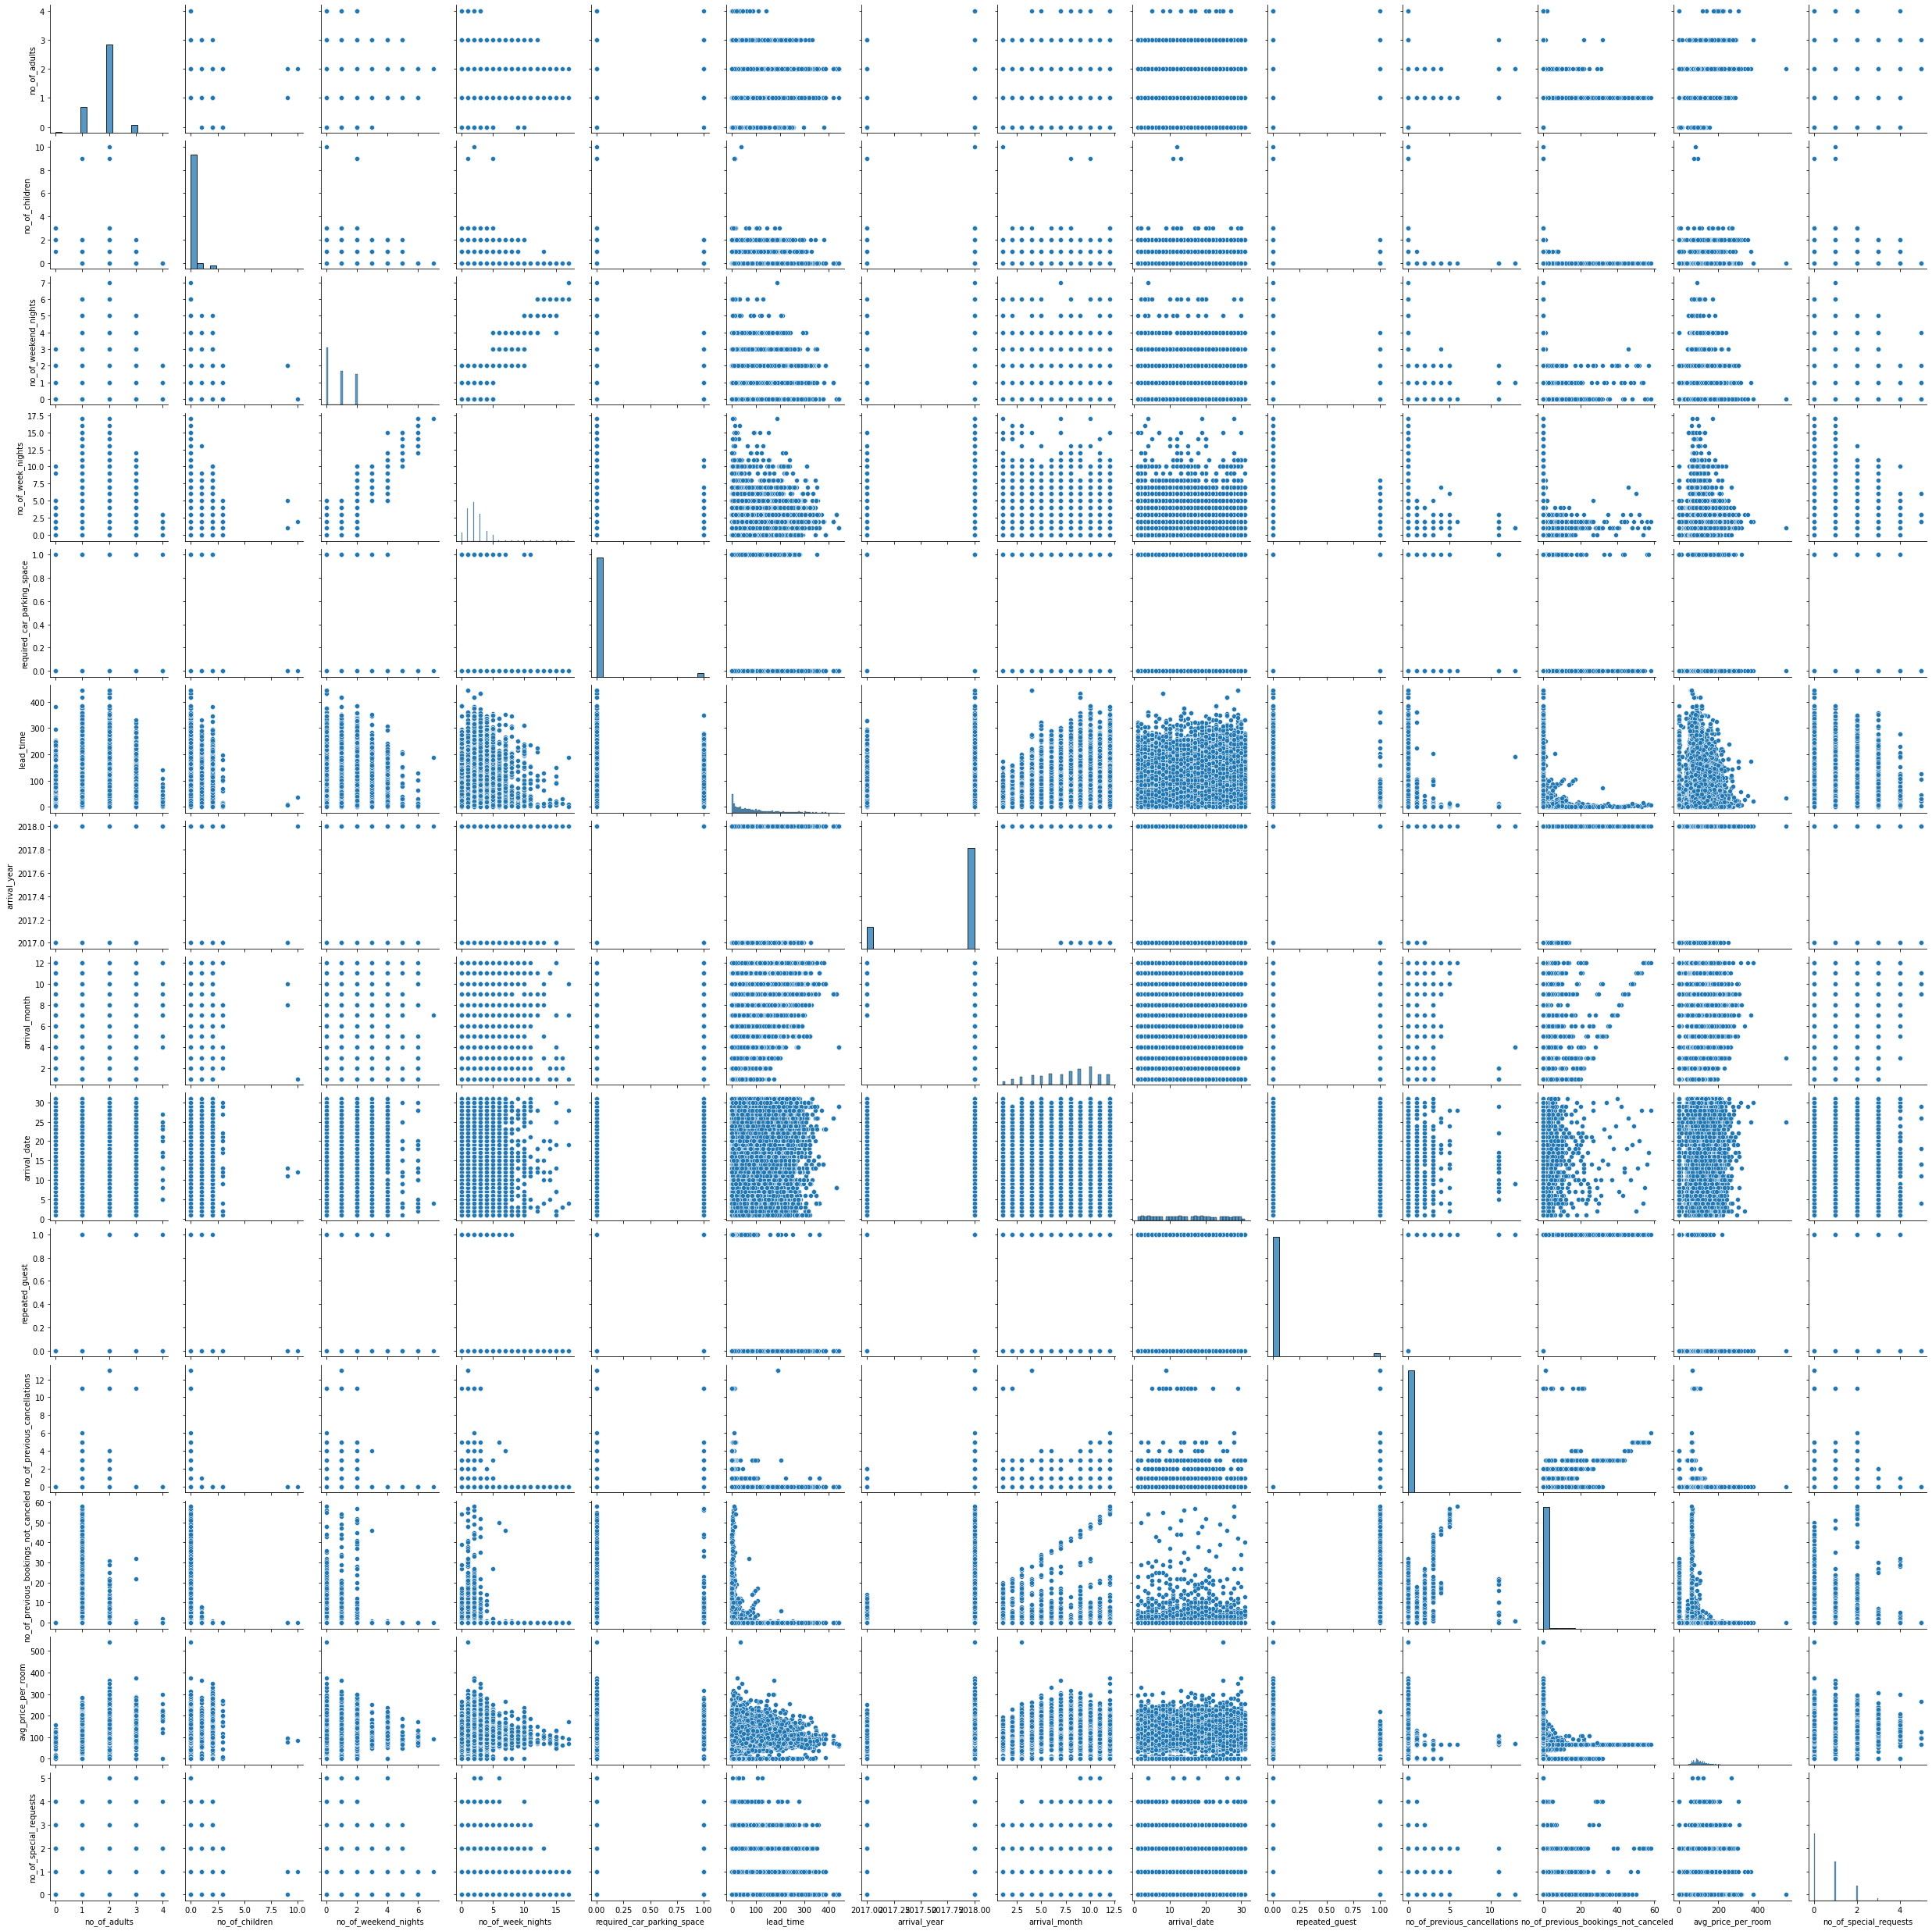

In [8]:
# Visualize distributions and relationships 
sns.pairplot(df)

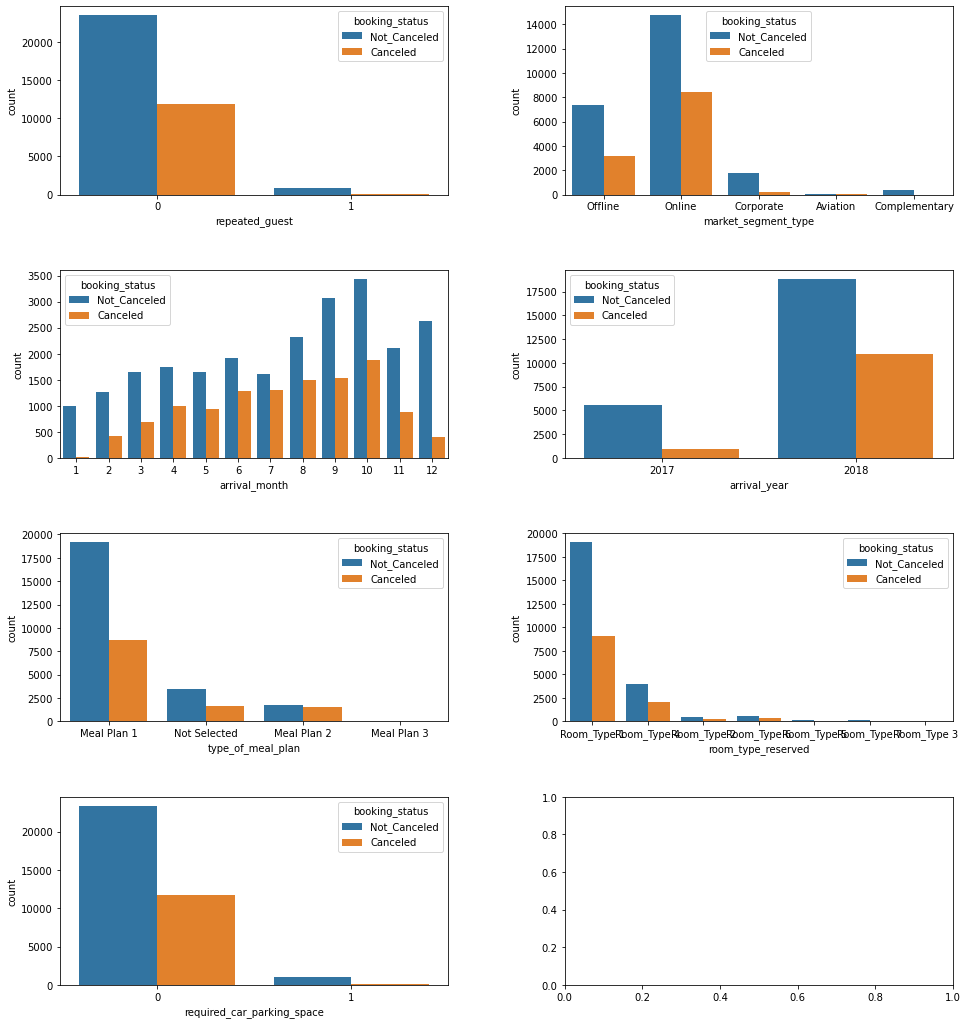

In [9]:
# Relationship between categorical variables and response
fig, ax = plt.subplots(4, 2, figsize=(16, 18));
plt.subplots_adjust(hspace = 0.4, wspace = 0.3);

sns.countplot(data=df, x ='repeated_guest', hue="booking_status", ax=ax[0, 0]);
sns.countplot(data=df,x='market_segment_type',hue='booking_status', ax=ax[0, 1]);
sns.countplot(data=df, x="arrival_month", hue="booking_status", ax=ax[1,0]);
sns.countplot(data=df, x="arrival_year",   hue="booking_status", ax=ax[1,1]);
sns.countplot(data=df, x="type_of_meal_plan",   hue="booking_status", ax=ax[2,0]);
sns.countplot(data=df, x="room_type_reserved",   hue="booking_status", ax=ax[2,1]);
sns.countplot(data=df, x="required_car_parking_space",   hue="booking_status", ax=ax[3,0]);


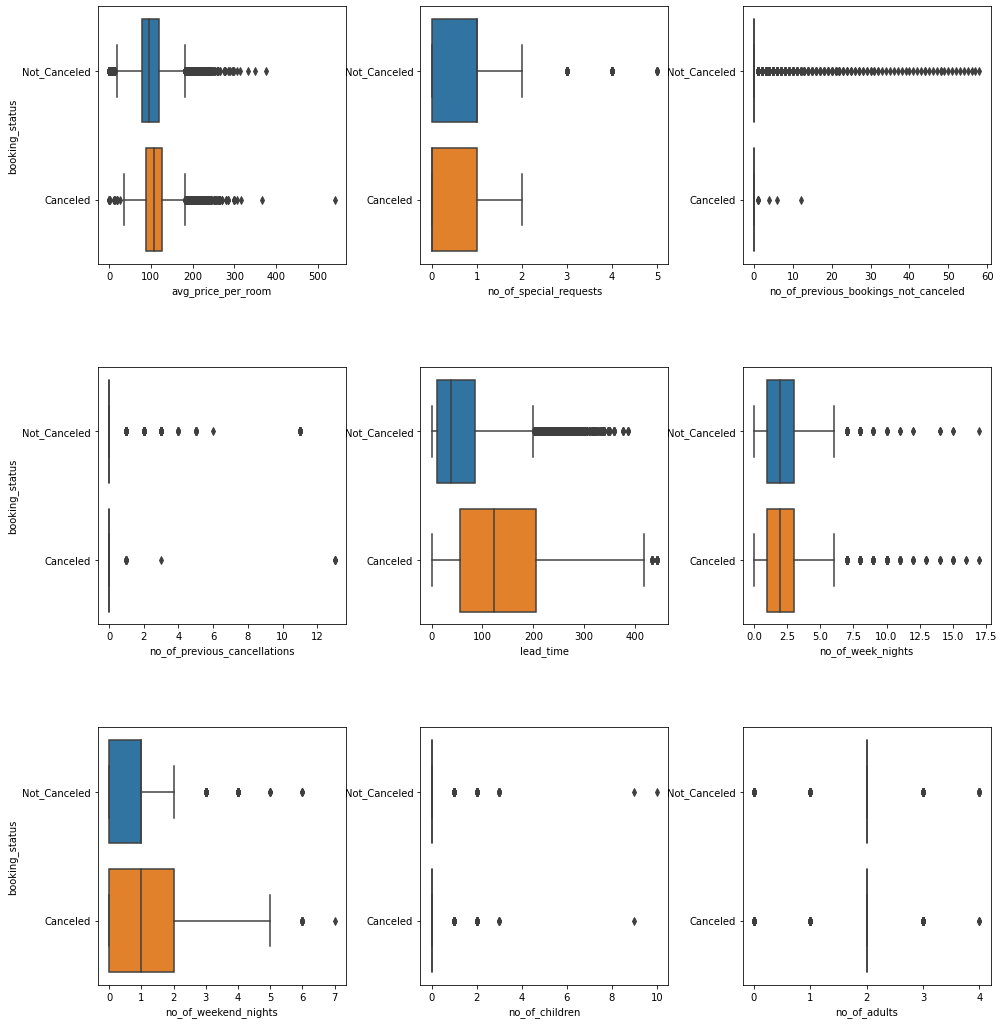

In [10]:
# Relationship between continuous variables and response
fig, ax = plt.subplots(3, 3, figsize=(16, 18));
plt.subplots_adjust(hspace = 0.4, wspace = 0.3);

sns.boxplot(data=df, x ='avg_price_per_room', y ='booking_status', ax=ax[0, 0]);
sns.boxplot(data=df, x ='no_of_special_requests', y ='booking_status', ax=ax[0, 1]).set(ylabel=None);
sns.boxplot(data=df, x ='no_of_previous_bookings_not_canceled', y ='booking_status', ax=ax[0, 2]).set(ylabel=None);
sns.boxplot(data=df, x ='no_of_previous_cancellations', y ='booking_status', ax=ax[1, 0]);
sns.boxplot(data=df, x ='lead_time', y ='booking_status', ax=ax[1, 1]).set(ylabel=None);
sns.boxplot(data=df, x ='no_of_week_nights', y ='booking_status', ax=ax[1, 2]).set(ylabel=None);
sns.boxplot(data=df, x ='no_of_weekend_nights', y ='booking_status', ax=ax[2, 0]);
sns.boxplot(data=df, x ='no_of_children', y ='booking_status', ax=ax[2, 1]).set(ylabel=None);
sns.boxplot(data=df, x ='no_of_adults', y ='booking_status', ax=ax[2, 2]).set(ylabel=None);

In [11]:
# Mapping response to 0 (Not Canceled) and 1 (Canceled)
df['booking_status'].replace(['Canceled', 'Not_Canceled'],[0, 1], inplace=True)

In [12]:
# Proportion of 0 and 1s in response
df.booking_status.value_counts(1)

1    0.672364
0    0.327636
Name: booking_status, dtype: float64

<AxesSubplot:xlabel='booking_status', ylabel='count'>

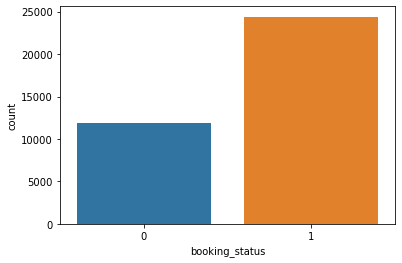

In [13]:
# Visualizing proportion of 0s and 1s in response
sns.countplot(x = 'booking_status', data = df)

In [14]:
# Correlation of continuous variables with response
df.corrwith(df.booking_status)

no_of_adults                           -0.086920
no_of_children                         -0.033078
no_of_weekend_nights                   -0.061563
no_of_week_nights                      -0.092996
required_car_parking_space              0.086185
lead_time                              -0.438538
arrival_year                           -0.179529
arrival_month                           0.011233
arrival_date                           -0.010629
repeated_guest                          0.107287
no_of_previous_cancellations            0.033728
no_of_previous_bookings_not_canceled    0.060179
avg_price_per_room                     -0.142569
no_of_special_requests                  0.253070
booking_status                          1.000000
dtype: float64

In [121]:
# Convert categorical variables to dummies and append to df 
dummy_market = pd.get_dummies(df.market_segment_type)
dummy_month = pd.get_dummies(df.arrival_month)
dummy_meal = pd.get_dummies(df.type_of_meal_plan)
dummy_room = pd.get_dummies(df.room_type_reserved)

# add dummy variables to df and drop 1 to avoid perfect multicollinearity in model 
df_dummy = pd.concat([df, dummy_market.drop('Aviation', axis = 1), dummy_month.drop(4, axis = 1), dummy_meal.drop('Meal Plan 3', axis = 1), dummy_room.drop('Room_Type 7', axis = 1)], axis = 1)
df_dummy.columns = df_dummy.columns.astype(str)
df_dummy.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,...,12,Meal Plan 1,Meal Plan 2,Not Selected,Room_Type 1,Room_Type 2,Room_Type 3,Room_Type 4,Room_Type 5,Room_Type 6
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,...,0,1,0,0,1,0,0,0,0,0
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,...,0,0,0,1,1,0,0,0,0,0
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,...,0,1,0,0,1,0,0,0,0,0
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,...,0,1,0,0,1,0,0,0,0,0
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,...,0,0,0,1,1,0,0,0,0,0


In [122]:
# Remove spaces from column names 
df_dummy.columns = df_dummy.columns.str.replace(' ', '')

# Convert month number to name in columns 
df_dummy.rename(columns={'1': 'January', '2': 'February', '3': 'March', 
                         '5': 'May', '6': 'June', '7': 'July', 
                        '8': 'August', '9': 'September', '10': 'October',
                        '11': 'November', '12': 'December'}, inplace=True)

df_dummy.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,...,December,MealPlan1,MealPlan2,NotSelected,Room_Type1,Room_Type2,Room_Type3,Room_Type4,Room_Type5,Room_Type6
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,...,0,1,0,0,1,0,0,0,0,0
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,...,0,0,0,1,1,0,0,0,0,0
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,...,0,1,0,0,1,0,0,0,0,0
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,...,0,1,0,0,1,0,0,0,0,0
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,...,0,0,0,1,1,0,0,0,0,0


In [123]:
# Split train and test datasets
train, test = train_test_split(df_dummy, test_size=0.25, random_state=25, shuffle=True)
train.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,...,December,MealPlan1,MealPlan2,NotSelected,Room_Type1,Room_Type2,Room_Type3,Room_Type4,Room_Type5,Room_Type6
6093,INN06094,2,0,2,3,Meal Plan 1,0,Room_Type 4,85,2018,...,0,1,0,0,0,0,0,1,0,0
11877,INN11878,1,0,0,3,Meal Plan 1,0,Room_Type 1,166,2018,...,0,1,0,0,1,0,0,0,0,0
27585,INN27586,2,0,2,2,Meal Plan 1,0,Room_Type 2,159,2018,...,0,1,0,0,0,1,0,0,0,0
28306,INN28307,2,0,1,0,Meal Plan 1,0,Room_Type 1,258,2018,...,0,1,0,0,1,0,0,0,0,0
19753,INN19754,2,0,0,3,Meal Plan 1,0,Room_Type 1,116,2018,...,0,1,0,0,1,0,0,0,0,0


Text(0.5, 0, 'Lead Time Binned')

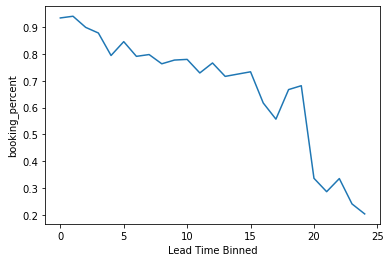

In [66]:
# Line plots of relationship between response and highly correlated continuous predictors 
binned_lead = pd.qcut(train['lead_time'],25,retbins=True)
train['lead_binned'] = binned_lead[0]

lead_data = train.groupby('lead_binned')['booking_status'].agg([('booking_percent','mean'),('nobs','count')]).reset_index(drop=False)
sns.lineplot(x = lead_data.index, y= lead_data['booking_percent'])
plt.xlabel('Lead Time Binned')

In [ ]:
lead_data

We see that the relationship between lead time and percentage of people canceling a booking displays a very close linear relationship. So people who make their booking between 6 months and 1 year in advance have a lower likelihood of canceling. 

Text(0.5, 0, 'Average Price Per Room Binned')

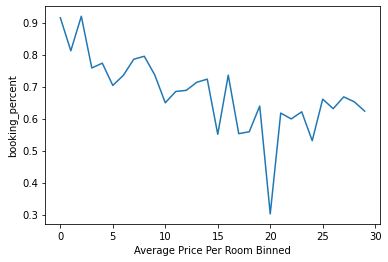

In [21]:
# Line plots of relationship between response and highly correlated continuous predictors 
binned_price = pd.qcut(train['avg_price_per_room'],30,retbins=True)
train['price_binned'] = binned_price[0]

price_data = train.groupby('price_binned')['booking_status'].agg([('booking_percent','mean'),('nobs','count')]).reset_index(drop=False)
sns.lineplot(x = price_data.index, y= price_data['booking_percent'])
plt.xlabel('Average Price Per Room Binned')

Rooms that have a higher average price of about 100 - 500 dollars are less likely to be canceled. The booking_percent seems to plateau, so this predictor may need to be transformed. 

In [ ]:
price_data

Text(0.5, 0, 'Number of Special Requests Binned')

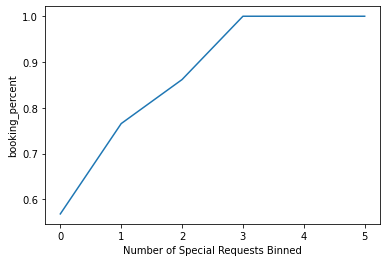

In [22]:
# Line plots of relationship between response and highly correlated continuous predictors 
special_data = train.groupby('no_of_special_requests')['booking_status'].agg([('booking_percent','mean'),('nobs','count')]).reset_index(drop=False)
sns.lineplot(x = special_data.index, y= special_data['booking_percent'])
plt.xlabel('Number of Special Requests Binned')

A higher number of special requests greatly increases the likelihood that the booking will be canceled. 

In [ ]:
# Split train and test datasets
y = df_dummy.booking_status
X = df_dummy.drop('booking_status', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0, shuffle=True, stratify=y)


In [ ]:
# drop response from test dataset 
test = test.drop('booking_status', axis = 1)

## Baseline Model 
Evaluating model with all predictor variables. Categorical predictors have been transformed to dummy variables. 

In [23]:
# Baseline model with all predictors (continuous and categorical) and no interactions 
baseline_model = sm.logit('booking_status~no_of_adults+no_of_children+no_of_weekend_nights+\
       no_of_week_nights+required_car_parking_space+\
       lead_time+arrival_year+\
       arrival_date+repeated_guest+\
       no_of_previous_cancellations+no_of_previous_bookings_not_canceled+\
       avg_price_per_room+no_of_special_requests+\
       Complementary+Corporate+Offline+Online+January+February+March+May+June+\
       July+August+September+October+November+December+MealPlan1+MealPlan2+\
       NotSelected+Room_Type1+Room_Type2+Room_Type3+\
       Room_Type4+Room_Type5+Room_Type6', data = train).fit()
baseline_model.summary()

         Current function value: 0.406889
         Iterations: 35


C:\Users\hodaf\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:         booking_status   No. Observations:                27206
Model:                          Logit   Df Residuals:                    27168
Method:                           MLE   Df Model:                           37
Date:                Sat, 04 Mar 2023   Pseudo R-squ.:                  0.3553
Time:                        09:20:32   Log-Likelihood:                -11070.
converged:                      False   LL-Null:                       -17170.
Covariance Type:            nonrobust   LLR p-value:                     0.000
========================================================================================================
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                              953.3177   3.45e+04      0.028      0.978   -6.67e+04    6.86e+04
no_of_adults                            -0.1417      0.038     -3.735      0.000      -0.216      -0.067
no_of_children                          -0.2050      0.059     -3.451      0.001      -0.321      -0.089
no_of_weekend_nights                    -0.1310      0.020     -6.638      0.000      -0.170      -0.092
no_of_week_nights                       -0.0563      0.012     -4.563      0.000      -0.080      -0.032
required_car_parking_space               1.7396      0.142     12.226      0.000       1.461       2.019
lead_time                               -0.0162      0.000    -57.587      0.000      -0.017      -0.016
arrival_year                            -0.4718      0.062     -7.561      0.000      -0.594      -0.350
arrival_date                            -0.0026      0.002     -1.354      0.176      -0.006       0.001
repeated_guest                           2.0207      0.483      4.181      0.000       1.074       2.968
no_of_previous_cancellations            -0.3279      0.095     -3.465      0.001      -0.513      -0.142
no_of_previous_bookings_not_canceled     0.0903      0.077      1.173      0.241      -0.061       0.241
avg_price_per_room                      -0.0194      0.001    -23.911      0.000      -0.021      -0.018
no_of_special_requests                   1.5720      0.030     51.984      0.000       1.513       1.631
Complementary                           20.6477   3752.665      0.006      0.996   -7334.441    7375.737
Corporate                                0.8690      0.253      3.437      0.001       0.373       1.365
Offline                                  1.9568      0.242      8.088      0.000       1.483       2.431
Online                                   0.1045      0.239      0.438      0.662      -0.363       0.572
January                                  2.2706      0.251      9.051      0.000       1.779       2.762
February                                -0.5317      0.093     -5.726      0.000      -0.714      -0.350
March                                   -0.2699      0.082     -3.303      0.001      -0.430      -0.110
May                                      0.3591      0.081      4.449      0.000       0.201       0.517
June                                     0.1412      0.077      1.843      0.065      -0.009       0.291
July                                     0.2188      0.079      2.779      0.005       0.065       0.373
August                                   0.1996      0.077      2.576      0.010       0.048       0.351
September                                0.3166      0.079      4.013      0.000       0.162       0.471
October                                 -0.0305      0.075     -0.407      0.684      -0.177       0.116
November                                -0.3207      0.083     -3.843      0.000      -0.48

In [24]:
#Function to compute confusion matrix and prediction accuracy on test/train data
def confusion_matrix_data(data,actual_values,model,cutoff=0.5):
#Predict the values using the Logit model
    pred_values = model.predict(data)
# Specify the bins
    bins=np.array([0,cutoff,1])
#Confusion matrix
    cm = np.histogram2d(actual_values, pred_values, bins=bins)[0]
    cm_df = pd.DataFrame(cm)
    cm_df.columns = ['Predicted 0','Predicted 1']
    cm_df = cm_df.rename(index={0: 'Actual 0',1:'Actual 1'})
# Calculate the accuracy
    accuracy = (cm[0,0]+cm[1,1])/cm.sum()
    fnr = (cm[1,0])/(cm[1,0]+cm[1,1])
    precision = (cm[1,1])/(cm[0,1]+cm[1,1])
    fpr = (cm[0,1])/(cm[0,0]+cm[0,1])
    tpr = (cm[1,1])/(cm[1,0]+cm[1,1])
    fpr_roc, tpr_roc, auc_thresholds = roc_curve(actual_values, pred_values)
    auc_value = (auc(fpr_roc, tpr_roc))# AUC of ROC
    sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='g')
    plt.ylabel("Actual Values")
    plt.xlabel("Predicted Values")
    print("Classification accuracy = {:.1%}".format(accuracy))
    print("Precision = {:.1%}".format(precision))
    print("TPR or Recall = {:.1%}".format(tpr))
    print("FNR = {:.1%}".format(fnr))
    print("FPR = {:.1%}".format(fpr))
    print("ROC-AUC = {:.1%}".format(auc_value))

Classification accuracy = 80.6%
Precision = 80.8%
TPR or Recall = 93.3%
FNR = 6.7%
FPR = 45.8%
ROC-AUC = 87.5%


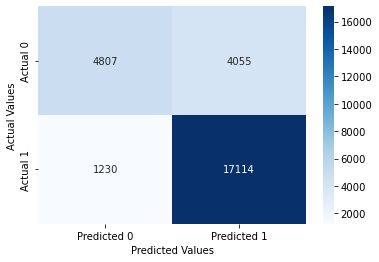

In [25]:
# Evaluating baseline model on train data
confusion_matrix_data(train, train.booking_status, baseline_model, cutoff = 0.4)

Classification accuracy = 79.8%
Precision = 79.8%
TPR or Recall = 93.3%
FNR = 6.7%
FPR = 47.3%
ROC-AUC = 86.4%


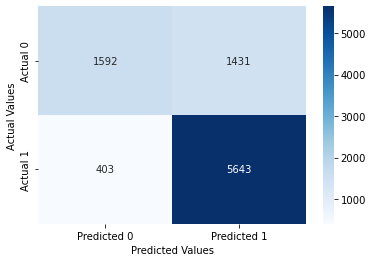

In [26]:
# Evaluating baseline model on test data
confusion_matrix_data(test, test.booking_status, baseline_model, cutoff = 0.4)

In [27]:
# Baseline model with only continuous and binary categorical variables 
baseline_cont_model = sm.logit('booking_status~no_of_adults+no_of_children+no_of_weekend_nights+\
       no_of_week_nights+required_car_parking_space+\
       lead_time+arrival_year+\
       arrival_date+repeated_guest+\
       no_of_previous_cancellations+no_of_previous_bookings_not_canceled+\
       avg_price_per_room+no_of_special_requests', data = train).fit()
baseline_cont_model.summary()

Optimization terminated successfully.
         Current function value: 0.454970
         Iterations 12


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:         booking_status   No. Observations:                27206
Model:                          Logit   Df Residuals:                    27192
Method:                           MLE   Df Model:                           13
Date:                Sat, 04 Mar 2023   Pseudo R-squ.:                  0.2791
Time:                        09:27:37   Log-Likelihood:                -12378.
converged:                       True   LL-Null:                       -17170.
Covariance Type:            nonrobust   LLR p-value:                     0.000
========================================================================================================
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                             1960.2624    100.223     19.559      0.000    1763.829    2156.695
no_of_adults                            -0.1899      0.033     -5.754      0.000      -0.255      -0.125
no_of_children                          -0.0154      0.042     -0.363      0.717      -0.098       0.068
no_of_weekend_nights                    -0.1669      0.018     -9.175      0.000      -0.203      -0.131
no_of_week_nights                       -0.0526      0.011     -4.675      0.000      -0.075      -0.031
required_car_parking_space               1.3970      0.136     10.237      0.000       1.130       1.665
lead_time                               -0.0122      0.000    -58.370      0.000      -0.013      -0.012
arrival_year                            -0.9696      0.050    -19.520      0.000      -1.067      -0.872
arrival_date                            -0.0015      0.002     -0.827      0.408      -0.005       0.002
repeated_guest                           2.1063      0.430      4.902      0.000       1.264       2.948
no_of_previous_cancellations            -0.2415      0.076     -3.197      0.001      -0.390      -0.093
no_of_previous_bookings_not_canceled     0.0954      0.085      1.128      0.259      -0.070       0.261
avg_price_per_room                      -0.0180      0.001    -31.509      0.000      -0.019      -0.017
no_of_special_requests                   1.1698      0.026     44.880      0.000       1.119       1.221
========================================================================================================
"""

Classification accuracy = 78.3%
Precision = 78.1%
TPR or Recall = 94.3%
FNR = 5.7%
FPR = 54.7%
ROC-AUC = 83.8%


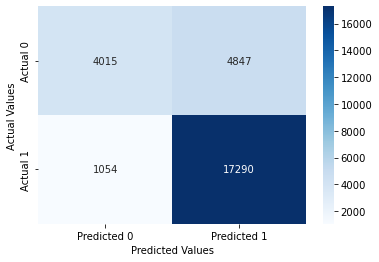

In [28]:
# Evaluating baseline continous model on train data
confusion_matrix_data(train, train.booking_status, baseline_cont_model, cutoff = 0.4)

Classification accuracy = 77.4%
Precision = 77.1%
TPR or Recall = 94.1%
FNR = 5.9%
FPR = 56.1%
ROC-AUC = 82.8%


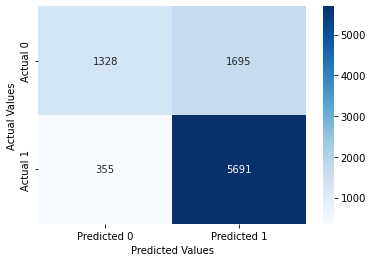

In [29]:
# Evaluating baseline continous model on test data
confusion_matrix_data(test, test.booking_status, baseline_cont_model, cutoff = 0.4)

## EDA-Based Models
Models with variable transformations and interactions based on EDA. 

In [30]:
# Initial Logit model 
logit_model_1 = sm.logit('booking_status~np.log(lead_time+1)+np.log(avg_price_per_room+1)+no_of_special_requests',
                        data = train).fit()
logit_model_1.summary()

Optimization terminated successfully.
         Current function value: 0.478240
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:         booking_status   No. Observations:                27206
Model:                          Logit   Df Residuals:                    27202
Method:                           MLE   Df Model:                            3
Date:                Sat, 04 Mar 2023   Pseudo R-squ.:                  0.2422
Time:                        09:27:46   Log-Likelihood:                -13011.
converged:                       True   LL-Null:                       -17170.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                         13.4977      0.288     46.883      0.000      12.933      14.062
np.log(lead_time + 1)             -0.8436      0.015    -57.079      0.000      -0.873      -0.815
np.log(avg_price_per_room + 1)    -2.1477      0.058    -37.061      0.000      -2.261      -2.034
no_of_special_requests             1.0933      0.024     45.054      0.000       1.046       1.141
==================================================================================================
"""

Classification accuracy = 77.1%
Precision = 77.4%
TPR or Recall = 93.3%
FNR = 6.7%
FPR = 56.3%
ROC-AUC = 82.2%


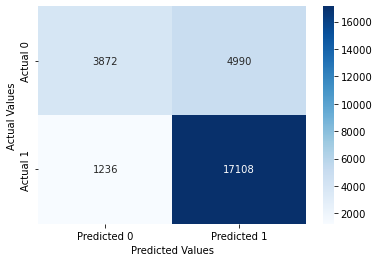

In [31]:
confusion_matrix_data(train, train.booking_status, logit_model_1, cutoff = 0.4)

Classification accuracy = 76.0%
Precision = 76.3%
TPR or Recall = 92.7%
FNR = 7.3%
FPR = 57.5%
ROC-AUC = 81.1%


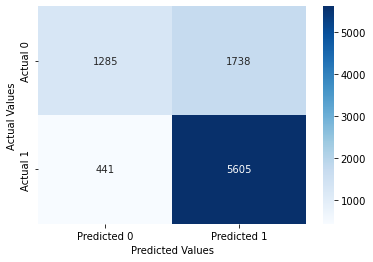

In [32]:
confusion_matrix_data(test, test.booking_status, logit_model_1, cutoff = 0.4)

In [33]:
# Logistic regression model with only continuous variables
logit_model_2 = sm.logit('booking_status~no_of_special_requests+np.log(lead_time+1)+no_of_weekend_nights+\
no_of_weekend_nights*no_of_week_nights+no_of_previous_cancellations+\
no_of_previous_cancellations*no_of_previous_bookings_not_canceled+\
np.log(avg_price_per_room+1)+np.log(avg_price_per_room+1)*no_of_adults+np.log(avg_price_per_room+1)*no_of_children', data = train).fit()
logit_model_2.summary()

Optimization terminated successfully.
         Current function value: 0.473369
         Iterations 11


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:         booking_status   No. Observations:                27206
Model:                          Logit   Df Residuals:                    27192
Method:                           MLE   Df Model:                           13
Date:                Sat, 04 Mar 2023   Pseudo R-squ.:                  0.2500
Time:                        09:27:49   Log-Likelihood:                -12878.
converged:                       True   LL-Null:                       -17170.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=====================================================================================================================================
                                                                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                            15.7306      1.040     15.131      0.000      13.693      17.768
no_of_special_requests                                                1.1354      0.025     45.284      0.000       1.086       1.185
np.log(lead_time + 1)                                                -0.8423      0.015    -55.044      0.000      -0.872      -0.812
no_of_weekend_nights                                                  0.0626      0.029      2.136      0.033       0.005       0.120
no_of_week_nights                                                     0.0940      0.018      5.241      0.000       0.059       0.129
no_of_weekend_nights:no_of_week_nights                               -0.0733      0.008     -9.010      0.000      -0.089      -0.057
no_of_previous_cancellations                                         -0.0735      0.080     -0.916      0.360      -0.231       0.084
no_of_previous_bookings_not_canceled                                  0.4605      0.150      3.079      0.002       0.167       0.754
no_of_previous_cancellations:no_of_previous_bookings_not_canceled    -0.0368      0.019     -1.962      0.050      -0.074   -4.17e-05
np.log(avg_price_per_room + 1)                                       -2.5905      0.222    -11.694      0.000      -3.025      -2.156
no_of_adults                                                         -1.3215      0.510     -2.589      0.010      -2.322      -0.321
np.log(avg_price_per_room + 1):no_of_adults                           0.2485      0.108      2.300      0.021       0.037       0.460
no_of_children                                                       -1.5019      0.524     -2.866      0.004      -2.529      -0.475
np.log(avg_price_per_room + 1):no_of_children                         0.2840      0.105      2.699      0.007       0.078       0.490
=====================================================================================================================================
"""

Classification accuracy = 77.3%
Precision = 77.7%
TPR or Recall = 93.1%
FNR = 6.9%
FPR = 55.4%
ROC-AUC = 82.7%


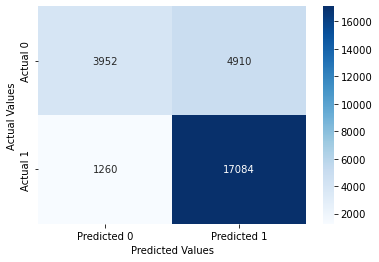

In [34]:
confusion_matrix_data(train, train.booking_status, logit_model_2, cutoff = 0.4)

Classification accuracy = 76.2%
Precision = 76.6%
TPR or Recall = 92.5%
FNR = 7.5%
FPR = 56.5%
ROC-AUC = 81.5%


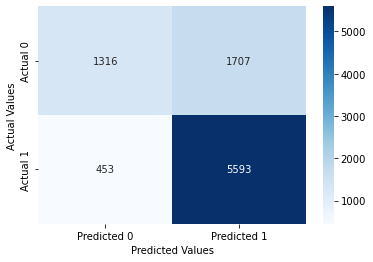

In [35]:
confusion_matrix_data(test, test.booking_status, logit_model_2, cutoff = 0.4)

In [37]:
# Logistic regression model adding categorical variables
logit_model_3 = sm.logit('booking_status~no_of_special_requests+np.log(lead_time+1)+no_of_weekend_nights+\
np.log(avg_price_per_room+1)+avg_price_per_room*no_of_adults+avg_price_per_room*no_of_children+\
repeated_guest', data = train).fit()
logit_model_3.summary()

Optimization terminated successfully.
         Current function value: 0.474553
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:         booking_status   No. Observations:                27206
Model:                          Logit   Df Residuals:                    27195
Method:                           MLE   Df Model:                           10
Date:                Sat, 04 Mar 2023   Pseudo R-squ.:                  0.2481
Time:                        09:27:57   Log-Likelihood:                -12911.
converged:                       True   LL-Null:                       -17170.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                            10.0624      0.855     11.775      0.000       8.387      11.737
no_of_special_requests                1.1408      0.025     45.637      0.000       1.092       1.190
np.log(lead_time + 1)                -0.8350      0.015    -54.729      0.000      -0.865      -0.805
no_of_weekend_nights                 -0.1620      0.017     -9.285      0.000      -0.196      -0.128
np.log(avg_price_per_room + 1)       -0.8309      0.241     -3.446      0.001      -1.304      -0.358
avg_price_per_room                   -0.0222      0.003     -6.527      0.000      -0.029      -0.016
no_of_adults                         -0.6579      0.114     -5.764      0.000      -0.882      -0.434
avg_price_per_room:no_of_adults       0.0049      0.001      5.108      0.000       0.003       0.007
no_of_children                       -0.5590      0.124     -4.506      0.000      -0.802      -0.316
avg_price_per_room:no_of_children     0.0036      0.001      4.454      0.000       0.002       0.005
repeated_guest                        1.3909      0.285      4.877      0.000       0.832       1.950
=====================================================================================================
"""

Classification accuracy = 77.2%
Precision = 77.5%
TPR or Recall = 93.3%
FNR = 6.7%
FPR = 56.1%
ROC-AUC = 82.5%


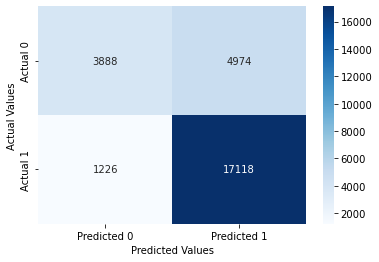

In [38]:
confusion_matrix_data(train, train.booking_status, logit_model_3, cutoff = 0.4)

Classification accuracy = 76.1%
Precision = 76.5%
TPR or Recall = 92.6%
FNR = 7.4%
FPR = 56.9%
ROC-AUC = 81.4%


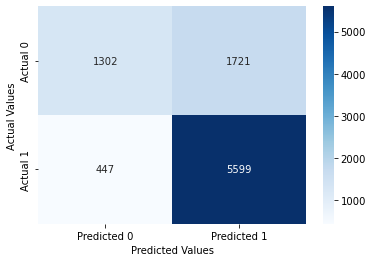

In [39]:
confusion_matrix_data(test, test.booking_status, logit_model_3, cutoff = 0.4)

## Variable Selection

In [56]:
#Creating a set of predictors from which we need to find the best subset of predictors
X = train[['no_of_adults', 'no_of_children','no_of_weekend_nights','no_of_week_nights',
           'required_car_parking_space','lead_time','arrival_year',
            'arrival_date','repeated_guest', 'no_of_previous_cancellations',
       'no_of_previous_bookings_not_canceled','avg_price_per_room', 'no_of_special_requests','Complementary',
        'Corporate','Offline', 'Online','January',
       'February', 'March', 'May', 'June', 'July', 'August', 'September',
       'October', 'November', 'December', 'MealPlan1', 'MealPlan2',
       'NotSelected', 'Room_Type1', 'Room_Type2', 'Room_Type3', 'Room_Type4',
       'Room_Type5', 'Room_Type6']]

In [120]:
train.columns

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year',
       ...
       'repeated_guest_no_of_previous_cancellations',
       'repeated_guest_no_of_previous_bookings_not_canceled',
       'repeated_guest_avg_price_per_room',
       'repeated_guest_no_of_special_requests',
       'no_of_previous_cancellations_no_of_previous_bookings_not_canceled',
       'no_of_previous_cancellations_avg_price_per_room',
       'no_of_previous_cancellations_no_of_special_requests',
       'no_of_previous_bookings_not_canceled_avg_price_per_room',
       'no_of_previous_bookings_not_canceled_no_of_special_requests',
       'avg_price_per_room_no_of_special_requests'],
      dtype='object', length=134)

In [100]:
# All predictors
X = train[['no_of_adults', 'no_of_children','no_of_weekend_nights','no_of_week_nights',
           'required_car_parking_space','lead_time','arrival_year', 
            'arrival_date','repeated_guest', 'no_of_previous_cancellations',
       'no_of_previous_bookings_not_canceled','avg_price_per_room', 'no_of_special_requests', 
          'MealPlan1', 'MealPlan2', 'January',
       'February', 'March', 'May', 'June', 'July', 'August', 'September',
       'October', 'November', 'December',
       'NotSelected', 'Room_Type1', 'Room_Type2', 'Room_Type3', 'Room_Type4',
       'Room_Type5', 'Room_Type6']]

In [110]:
# Continuous and binary categorical predictors 
X = train[['no_of_adults', 'no_of_children','no_of_weekend_nights','no_of_week_nights',
           'required_car_parking_space','lead_time','arrival_year','arrival_month',
            'arrival_date', 'repeated_guest', 'no_of_previous_cancellations',
       'no_of_previous_bookings_not_canceled','avg_price_per_room', 'no_of_special_requests']]

In [ ]:
train.

In [64]:
train.dtypes

Booking_ID                                                 object
no_of_adults                                                int64
no_of_children                                              int64
no_of_weekend_nights                                        int64
no_of_week_nights                                           int64
                                                           ...   
no_of_week_nights_no_of_previous_cancellations              int64
no_of_week_nights_no_of_previous_bookings_not_canceled      int64
no_of_week_nights_avg_price_per_room                      float64
no_of_week_nights_no_of_special_requests                    int64
type_of_meal_plan_required_car_parking_space               object
Length: 104, dtype: object

In [50]:
X_backup = train[['no_of_adults', 'no_of_children','no_of_weekend_nights','no_of_week_nights','type_of_meal_plan',
           'required_car_parking_space', 'room_type_reserved','lead_time','arrival_year','arrival_month',
            'arrival_date','market_segment_type','repeated_guest', 'no_of_previous_cancellations',
       'no_of_previous_bookings_not_canceled','avg_price_per_room', 'no_of_special_requests']]

In [82]:
#Function to develop a model based on all predictors in predictor_subset
def processSubset(predictor_subset):
    # Fit model on feature_set and calculate R-squared
    model = sm.logit('booking_status~' + '+'.join(predictor_subset), data = train).fit()
    BIC = model.bic
    return {"model":model, "BIC":BIC}

In [58]:
#Function to find the best predictor out of p-k predictors and add it to the model containing the k predictors
def forward(predictors):

    # Pull out predictors we still need to process
    remaining_predictors = [p for p in X.columns if p not in predictors]
    
    tic = time.time()
    
    results = []
    
    for p in remaining_predictors:
        results.append(processSubset(predictors+[p]))
    
    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)
    
    # Choose the model with the highest RSS
    best_model = models.loc[models['BIC'].argmin()]
    
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors)+1, "predictors in", (toc-tic), "seconds.")
    
    # Return the best model, along with some other useful information about the model
    return best_model

In [59]:
def forward_selection():
    models_best = pd.DataFrame(columns=["BIC", "model"])

    tic = time.time()
    predictors = []

    for i in range(1,len(X.columns)+1):    
        models_best.loc[i] = forward(predictors)
        predictors = list(models_best.loc[i]["model"].params.index[1:])

    toc = time.time()
    print("Total elapsed time:", (toc-tic), "seconds.")
    return models_best

In [83]:
# Continuou and binary categorical predictors 
models_best = forward_selection()

Optimization terminated successfully.
         Current function value: 0.627206
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.630572
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.629293
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.626756
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.626106
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.535235
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.613451
         Iterations 20
Optimization terminated successfully.
         Current function value: 0.631053
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.631083
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.622996
 

Optimization terminated successfully.
         Current function value: 0.455840
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.455737
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.456258
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.456087
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.456246
         Iterations 12
Processed  7 models on 8 predictors in 0.38018321990966797 seconds.
Optimization terminated successfully.
         Current function value: 0.455594
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.455200
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.455083
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.455588
         Iterations 10
Optim

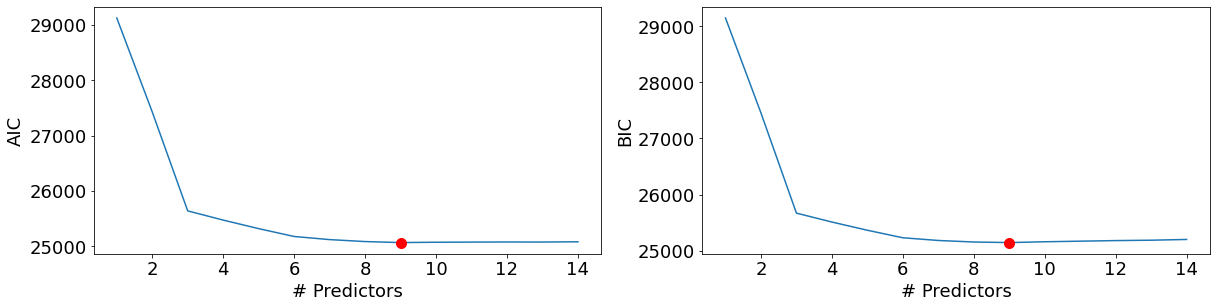

In [76]:
def best_sub_plots():
    plt.figure(figsize=(20,10))
    plt.rcParams.update({'font.size': 18, 'lines.markersize': 10})

    # Set up a 2x2 grid so we can look at 4 plots at once
    plt.subplot(2, 2, 1)


    # We'll do the same for AIC and BIC, this time looking for the models with the SMALLEST statistic
    aic = models_best.apply(lambda row: row[1].aic, axis=1)

    plt.subplot(2, 2, 1)
    plt.plot(aic)
    plt.plot(1+aic.argmin(), aic.min(), "or")
    plt.xlabel('# Predictors')
    plt.ylabel('AIC')

    bic = models_best.apply(lambda row: row[1].bic, axis=1)

    plt.subplot(2, 2, 2)
    plt.plot(bic)
    plt.plot(1+bic.argmin(), bic.min(), "or")
    plt.xlabel('# Predictors')
    plt.ylabel('BIC')


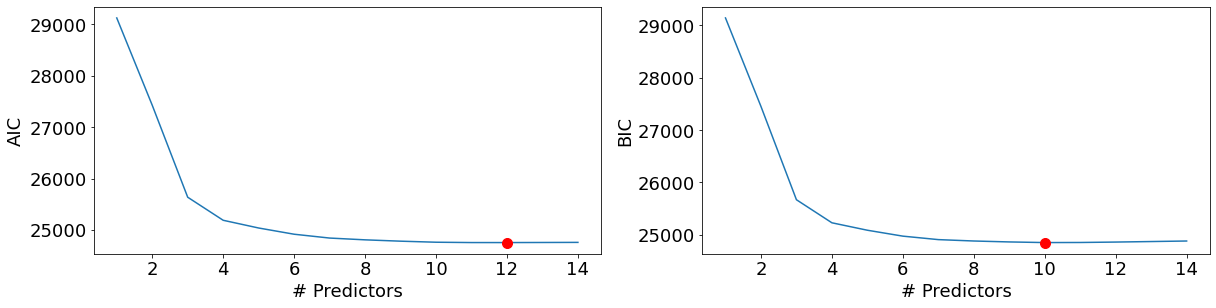

In [84]:
best_sub_plots()

In [85]:
best_forward_model = models_best.loc[11,'model']
models_best.loc[11,'model'].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:         booking_status   No. Observations:                27206
Model:                          Logit   Df Residuals:                    27194
Method:                           MLE   Df Model:                           11
Date:                Sat, 04 Mar 2023   Pseudo R-squ.:                  0.2798
Time:                        11:49:16   Log-Likelihood:                -12366.
converged:                       True   LL-Null:                       -17170.
Covariance Type:            nonrobust   LLR p-value:                     0.000
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                     1772.6269    106.801     16.597      0.000    1563.300    1981.954
lead_time                       -0.0124      0.000    -57.875      0.000      -0.013      -0.012
no_of_special_requests           1.1552      0.026     44.175      0.000       1.104       1.206
avg_price_per_room              -0.0186      0.001    -34.519      0.000      -0.020      -0.018
arrival_year                    -0.8767      0.053    -16.564      0.000      -0.980      -0.773
required_car_parking_space       1.4157      0.136     10.376      0.000       1.148       1.683
no_of_weekend_nights            -0.1672      0.018     -9.197      0.000      -0.203      -0.132
repeated_guest                   2.3360      0.390      5.996      0.000       1.572       3.100
no_of_adults                    -0.1862      0.033     -5.715      0.000      -0.250      -0.122
arrival_month                    0.0310      0.006      5.258      0.000       0.019       0.042
no_of_week_nights               -0.0535      0.011     -4.749      0.000      -0.076      -0.031
no_of_previous_cancellations    -0.2042      0.068     -2.997      0.003      -0.338      -0.071
================================================================================================
"""

Classification accuracy = 78.2%
Precision = 78.0%
TPR or Recall = 94.2%
FNR = 5.8%
FPR = 54.9%
ROC-AUC = 83.8%


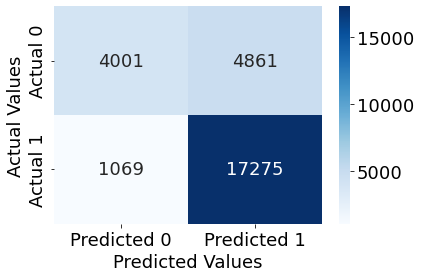

In [86]:
confusion_matrix_data(train, train.booking_status, best_forward_model, cutoff = 0.4)

Classification accuracy = 77.3%
Precision = 77.0%
TPR or Recall = 94.2%
FNR = 5.8%
FPR = 56.4%
ROC-AUC = 82.8%


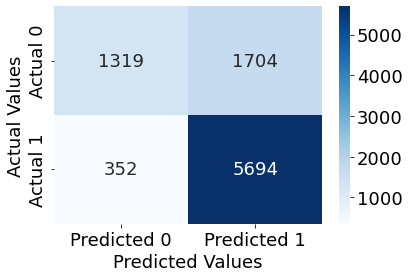

In [87]:
confusion_matrix_data(test, test.booking_status, best_forward_model, cutoff = 0.4)

In [101]:
# all predictors (except market_segment_type)
models_best = forward_selection()

Optimization terminated successfully.
         Current function value: 0.627206
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.630572
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.629293
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.626756
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.626106
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.535235
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.613451
         Iterations 20
Optimization terminated successfully.
         Current function value: 0.631083
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.622996
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.630324
 

Optimization terminated successfully.
         Current function value: 0.503787
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.503948
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.503167
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.503048
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.503832
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.503914
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.503918
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.495238
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.501132
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.497692
  

Optimization terminated successfully.
         Current function value: 0.454920
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.457683
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.456017
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.457720
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.456507
         Iterations 13
Optimization terminated successfully.
         Current function value: 0.456151
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.457075
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.453155
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.457085
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.

Optimization terminated successfully.
         Current function value: 0.443157
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.444036
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.445643
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.444564
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.445738
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.444957
         Iterations 13
Optimization terminated successfully.
         Current function value: 0.445302
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.445303
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.445025
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.

Optimization terminated successfully.
         Current function value: 0.440409
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.440646
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.440291
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.441101
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.441046
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.440309
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.441108
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.440670
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.441009
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.

Optimization terminated successfully.
         Current function value: 0.437865
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.437483
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.437483
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.437446
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.437571
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.437763
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.437822
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.437608
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.437738
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.

C:\Users\hodaf\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Optimization terminated successfully.
         Current function value: 0.435828
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.435857
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.435694
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.435488
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.435822
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.435747
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.435863
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.435817
         Iterations 13
Processed  14 models on 20 predictors in 3.647677183151245 seconds.
Optimization terminated successfully.
         Current function value: 0.435193
         Iterations 11
Optim

C:\Users\hodaf\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Optimization terminated successfully.
         Current function value: 0.435177
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.435190
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.435129
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.435127
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.435135
         Iterations 13
Optimization terminated successfully.
         Current function value: 0.435185
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.435082
         Iterations 12
Processed  12 models on 22 predictors in 3.624789237976074 seconds.
Optimization terminated successfully.
         Current function value: 0.434732
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.434602
         Iterations 11
Optim

C:\Users\hodaf\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Optimization terminated successfully.
         Current function value: 0.434768
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.434784
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.434758
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.434770
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.434715
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.434783
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.434749
         Iterations 11
Processed  11 models on 23 predictors in 3.3571650981903076 seconds.
Optimization terminated successfully.
         Current function value: 0.434546
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.434563
         Iterations 12
Opti

C:\Users\hodaf\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Optimization terminated successfully.
         Current function value: 0.434417
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.434432
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.434411
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.434433
         Iterations 13
Optimization terminated successfully.
         Current function value: 0.434430
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.434396
         Iterations 12
Processed  7 models on 27 predictors in 2.467388868331909 seconds.
         Current function value: 0.434395
         Iterations: 35


C:\Users\hodaf\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Optimization terminated successfully.
         Current function value: 0.434378
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.434393
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.434372
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.433692
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.434391
         Iterations 12
Processed  6 models on 28 predictors in 2.2665820121765137 seconds.
Optimization terminated successfully.
         Current function value: 0.433692
         Iterations 32
Optimization terminated successfully.
         Current function value: 0.433674
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.433687
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.433669
         Iterations 12
Optim

C:\Users\hodaf\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Optimization terminated successfully.
         Current function value: 0.433483
         Iterations 12
Processed  2 models on 32 predictors in 1.0766551494598389 seconds.
         Current function value: 0.433483
         Iterations: 35
Processed  1 models on 33 predictors in 0.7190182209014893 seconds.
Total elapsed time: 90.91288900375366 seconds.


C:\Users\hodaf\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


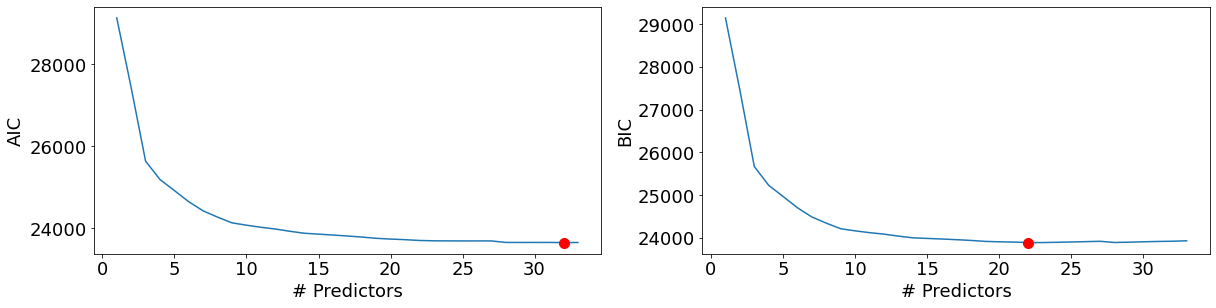

In [102]:
best_sub_plots()

In [103]:
best_forward_model = models_best.loc[22,'model']
models_best.loc[22,'model'].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:         booking_status   No. Observations:                27206
Model:                          Logit   Df Residuals:                    27183
Method:                           MLE   Df Model:                           22
Date:                Sat, 04 Mar 2023   Pseudo R-squ.:                  0.3111
Time:                        12:53:05   Log-Likelihood:                -11829.
converged:                       True   LL-Null:                       -17170.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                   1338.6576    116.361     11.504      0.000    1110.594    1566.721
lead_time                     -0.0141      0.000    -56.688      0.000      -0.015      -0.014
no_of_special_requests         1.2541      0.027     46.198      0.000       1.201       1.307
avg_price_per_room            -0.0234      0.001    -32.829      0.000      -0.025      -0.022
arrival_year                  -0.6611      0.058    -11.459      0.000      -0.774      -0.548
December                       1.3732      0.083     16.580      0.000       1.211       1.536
NotSelected                   -1.1252      0.076    -14.795      0.000      -1.274      -0.976
January                        2.3451      0.247      9.498      0.000       1.861       2.829
required_car_parking_space     1.5524      0.139     11.140      0.000       1.279       1.825
no_of_weekend_nights          -0.1753      0.019     -9.300      0.000      -0.212      -0.138
repeated_guest                 1.5735      0.312      5.040      0.000       0.962       2.185
no_of_week_nights             -0.0758      0.012     -6.405      0.000      -0.099      -0.053
June                           0.3374      0.057      5.943      0.000       0.226       0.449
September                      0.3711      0.055      6.768      0.000       0.264       0.479
May                            0.2979      0.062      4.819      0.000       0.177       0.419
Room_Type5                     0.9784      0.194      5.041      0.000       0.598       1.359
February                      -0.5882      0.081     -7.291      0.000      -0.746      -0.430
March                         -0.4092      0.066     -6.169      0.000      -0.539      -0.279
Room_Type6                     1.0048      0.139      7.225      0.000       0.732       1.277
MealPlan1                     -0.3238      0.061     -5.321      0.000      -0.443      -0.205
November                      -0.3331      0.067     -5.007      0.000      -0.463      -0.203
no_of_children                -0.2592      0.054     -4.790      0.000      -0.365      -0.153
no_of_adults                  -0.1611      0.034     -4.673      0.000      -0.229      -0.094
==============================================================================================
"""

Classification accuracy = 78.6%
Precision = 78.8%
TPR or Recall = 93.4%
FNR = 6.6%
FPR = 52.0%
ROC-AUC = 85.4%


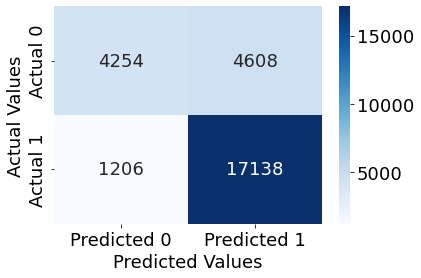

In [104]:
confusion_matrix_data(train, train.booking_status, best_forward_model, cutoff = 0.4)

Classification accuracy = 77.6%
Precision = 77.5%
TPR or Recall = 93.5%
FNR = 6.5%
FPR = 54.3%
ROC-AUC = 84.2%


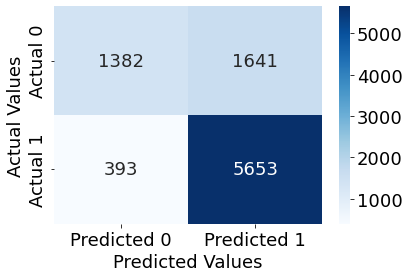

In [108]:
confusion_matrix_data(test, test.booking_status, best_forward_model, cutoff = 0.4)

In [47]:
def backward(predictors):
    
    tic = time.time()
    
    results = []
    
    for combo in itertools.combinations(predictors, len(predictors)-1):
        results.append(processSubset(combo))
    
    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)
    
    # Choose the model with the highest RSS
    best_model = models.loc[models['BIC'].argmin()]
    
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors)-1, "predictors in", (toc-tic), "seconds.")
    
    # Return the best model, along with some other useful information about the model
    return best_model

In [48]:
def backward_selection():
    models_best = pd.DataFrame(columns=["BIC", "model"], index = range(1,len(X.columns)))

    tic = time.time()
    predictors = X.columns
    models_best.loc[len(predictors)] = processSubset(predictors)
    
    while(len(predictors) > 1):  
        models_best.loc[len(predictors)-1] = backward(predictors)
        predictors = models_best.loc[len(predictors)-1]["model"].params.index[1:]

    toc = time.time()
    print("Total elapsed time:", (toc-tic), "seconds.")
    return models_best

In [111]:
# continuous and binary categorical variables
models_best = backward_selection()

Optimization terminated successfully.
         Current function value: 0.454469
         Iterations 13
Optimization terminated successfully.
         Current function value: 0.499598
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.474706
         Iterations 13
Optimization terminated successfully.
         Current function value: 0.454511
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.454643
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.455032
         Iterations 13
Optimization terminated successfully.
         Current function value: 0.454474
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.454970
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.459833
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.

Optimization terminated successfully.
         Current function value: 0.456273
         Iterations 11
Processed  8 models on 7 predictors in 0.9563024044036865 seconds.
Optimization terminated successfully.
         Current function value: 0.502961
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.483208
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.457680
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.464080
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.543038
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.458757
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.458423
         Iterations 10
Processed  7 models on 6 predictors in 0.793159008026123 seconds.
Optimization terminated successfully.
      

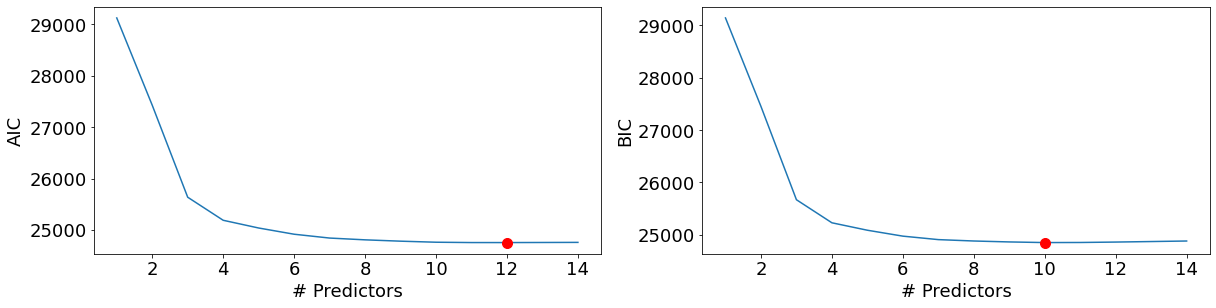

In [112]:
best_sub_plots()

In [113]:
best_backward_model = models_best.loc[11,'model']
models_best.loc[11,'model'].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:         booking_status   No. Observations:                27206
Model:                          Logit   Df Residuals:                    27194
Method:                           MLE   Df Model:                           11
Date:                Sat, 04 Mar 2023   Pseudo R-squ.:                  0.2798
Time:                        12:57:06   Log-Likelihood:                -12366.
converged:                       True   LL-Null:                       -17170.
Covariance Type:            nonrobust   LLR p-value:                     0.000
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                     1772.6269    106.801     16.597      0.000    1563.300    1981.954
no_of_adults                    -0.1862      0.033     -5.715      0.000      -0.250      -0.122
no_of_weekend_nights            -0.1672      0.018     -9.197      0.000      -0.203      -0.132
no_of_week_nights               -0.0535      0.011     -4.749      0.000      -0.076      -0.031
required_car_parking_space       1.4157      0.136     10.376      0.000       1.148       1.683
lead_time                       -0.0124      0.000    -57.875      0.000      -0.013      -0.012
arrival_year                    -0.8767      0.053    -16.564      0.000      -0.980      -0.773
arrival_month                    0.0310      0.006      5.258      0.000       0.019       0.042
repeated_guest                   2.3360      0.390      5.996      0.000       1.572       3.100
no_of_previous_cancellations    -0.2042      0.068     -2.997      0.003      -0.338      -0.071
avg_price_per_room              -0.0186      0.001    -34.519      0.000      -0.020      -0.018
no_of_special_requests           1.1552      0.026     44.175      0.000       1.104       1.206
================================================================================================
"""

Classification accuracy = 78.2%
Precision = 78.0%
TPR or Recall = 94.2%
FNR = 5.8%
FPR = 54.9%
ROC-AUC = 83.8%


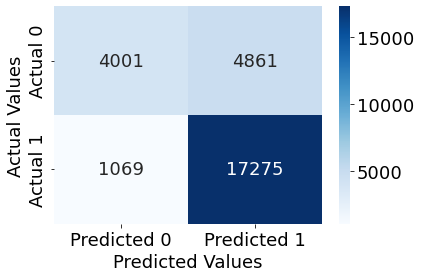

In [114]:
confusion_matrix_data(train, train.booking_status, best_backward_model, cutoff = 0.4)

Classification accuracy = 77.3%
Precision = 77.0%
TPR or Recall = 94.2%
FNR = 5.8%
FPR = 56.4%
ROC-AUC = 82.8%


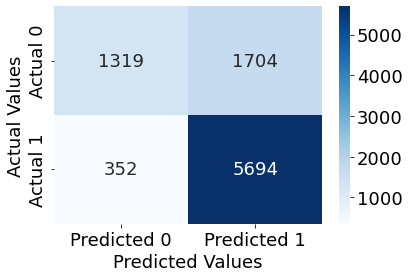

In [152]:
confusion_matrix_data(test, test.booking_status, best_backward_model, cutoff = 0.4)

In [116]:
X_backup = train[['no_of_adults', 'no_of_children','no_of_weekend_nights','no_of_week_nights',
           'required_car_parking_space','lead_time','arrival_year','arrival_month',
            'arrival_date', 'repeated_guest', 'no_of_previous_cancellations',
       'no_of_previous_bookings_not_canceled','avg_price_per_room', 'no_of_special_requests']]

In [117]:
#Including 2-factor interactions of predictors in train and 'X'. 
for combo in itertools.combinations(X_backup.columns, 2):    
    train['_'.join(combo)] = train[combo[0]]*train[combo[1]]
    test['_'.join(combo)] = test[combo[0]]*test[combo[1]]
    X.loc[:,'_'.join(combo)] = train.loc[:,'_'.join(combo)] 

C:\Users\hodaf\AppData\Local\Temp\ipykernel_13884\1442374694.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.loc[:,'_'.join(combo)] = train.loc[:,'_'.join(combo)]
C:\Users\hodaf\AppData\Local\Temp\ipykernel_13884\1442374694.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.loc[:,'_'.join(combo)] = train.loc[:,'_'.join(combo)]
C:\Users\hodaf\AppData\Local\Temp\ipykernel_13884\1442374694.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[

C:\Users\hodaf\AppData\Local\Temp\ipykernel_13884\1442374694.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.loc[:,'_'.join(combo)] = train.loc[:,'_'.join(combo)]
C:\Users\hodaf\AppData\Local\Temp\ipykernel_13884\1442374694.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.loc[:,'_'.join(combo)] = train.loc[:,'_'.join(combo)]
C:\Users\hodaf\AppData\Local\Temp\ipykernel_13884\1442374694.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[

C:\Users\hodaf\AppData\Local\Temp\ipykernel_13884\1442374694.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.loc[:,'_'.join(combo)] = train.loc[:,'_'.join(combo)]
C:\Users\hodaf\AppData\Local\Temp\ipykernel_13884\1442374694.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.loc[:,'_'.join(combo)] = train.loc[:,'_'.join(combo)]
C:\Users\hodaf\AppData\Local\Temp\ipykernel_13884\1442374694.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[

C:\Users\hodaf\AppData\Local\Temp\ipykernel_13884\1442374694.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.loc[:,'_'.join(combo)] = train.loc[:,'_'.join(combo)]
C:\Users\hodaf\AppData\Local\Temp\ipykernel_13884\1442374694.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.loc[:,'_'.join(combo)] = train.loc[:,'_'.join(combo)]
C:\Users\hodaf\AppData\Local\Temp\ipykernel_13884\1442374694.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[

In [118]:
models_best = forward_selection()

Optimization terminated successfully.
         Current function value: 0.627206
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.630572
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.629293
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.626756
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.626106
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.535235
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.613451
         Iterations 20
Optimization terminated successfully.
         Current function value: 0.631053
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.631083
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.622996
 

C:\Users\hodaf\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


LinAlgError: Singular matrix

## Ridge

In [119]:
y = train.booking_status

In [124]:
train.columns

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status',
       'Complementary', 'Corporate', 'Offline', 'Online', 'January',
       'February', 'March', 'May', 'June', 'July', 'August', 'September',
       'October', 'November', 'December', 'MealPlan1', 'MealPlan2',
       'NotSelected', 'Room_Type1', 'Room_Type2', 'Room_Type3', 'Room_Type4',
       'Room_Type5', 'Room_Type6'],
      dtype='object')

In [126]:
#Standardizing predictors so that each of them have zero mean and unit variance

#Filtering all predictors
X = train.loc[:,['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'required_car_parking_space',
       'lead_time', 'arrival_year', 
       'arrival_date', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 
       'Complementary', 'Corporate', 'Offline', 'Online', 'January',
       'February', 'March', 'May', 'June', 'July', 'August', 'September',
       'October', 'November', 'December', 'MealPlan1', 'MealPlan2',
       'NotSelected', 'Room_Type1', 'Room_Type2', 'Room_Type3', 'Room_Type4',
       'Room_Type5', 'Room_Type6']]; 

#Defining a scaler object
scaler = StandardScaler()

#The scaler object will contain the mean and variance of each column (predictor) of X. 
#These values will be useful to scale test data based on the same mean and variance as obtained on train data
scaler.fit(X)

#Using the scaler object (or the values of mean and variance stored in it) to standardize X (or train data)
Xstd = scaler.transform(X)

In [127]:
#The tuning parameter lambda is referred as alpha in sklearn

#Creating a range of values of the tuning parameter to visualize the ridge regression coefficients
#for different values of the tuning parameter
alphas = 10**np.linspace(10,-2,200)*0.5

In [128]:
#Finding the ridge regression coefficients for increasing values of the tuning parameter
coefs = []
for a in alphas:        
    ridge = Ridge(alpha = a)
    ridge.fit(Xstd, y)
    coefs.append(ridge.coef_)

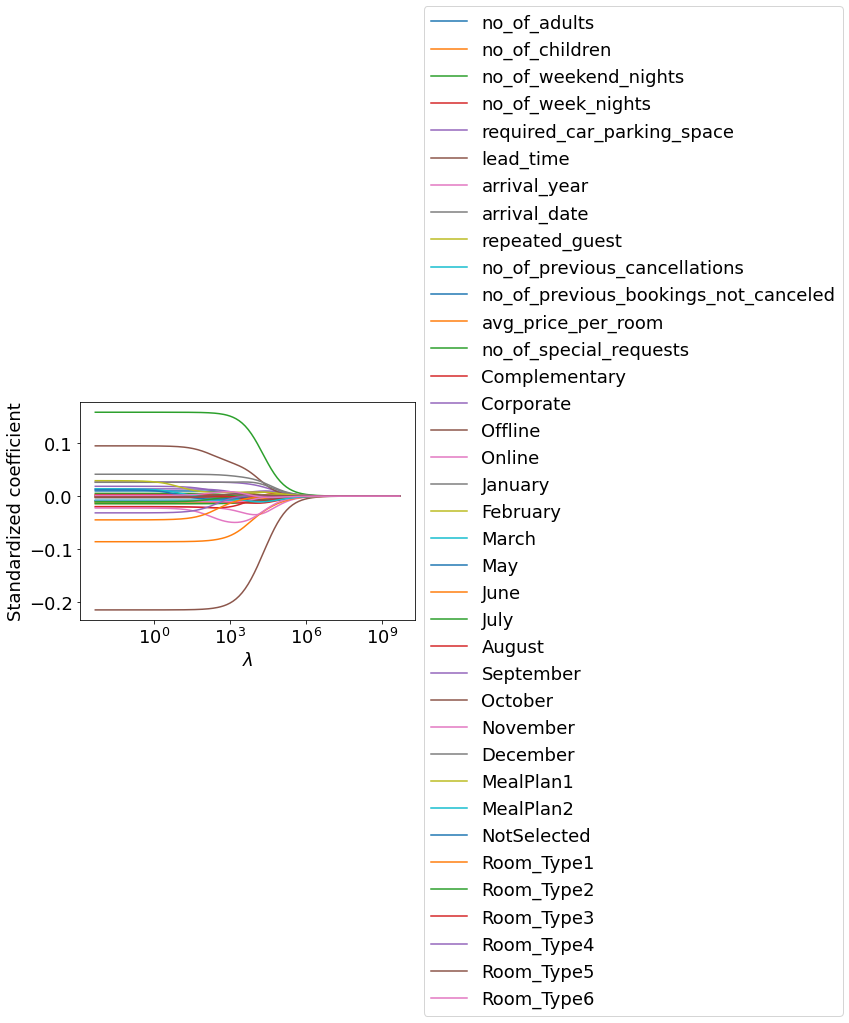

In [130]:
#Visualizing the shrinkage in ridge regression coefficients with increasing values of the tuning parameter lambda
plt.xlabel('xlabel', fontsize=18)
plt.ylabel('ylabel', fontsize=18)
plt.plot(alphas, coefs)
plt.xscale('log')
plt.xlabel('$\lambda$')
plt.ylabel('Standardized coefficient')
plt.legend(train.columns.drop(['booking_status', 'Booking_ID', 'type_of_meal_plan', 'market_segment_type', 
                               'arrival_month', 'room_type_reserved']), loc='center left', bbox_to_anchor=(1, 0.5));

In [131]:
#Let us use cross validation to find the optimal value of the tuning parameter - lambda
#For the optimal lambda, the cross validation error will be the least

#Note that we are reducing the range of alpha so as to better visualize the minimum
alphas = 10**np.linspace(1.5,-3,200)*0.5
ridgecv = RidgeCV(alphas = alphas,store_cv_values=True)
ridgecv.fit(Xstd, y)

#Optimal value of the tuning parameter - lambda
ridgecv.alpha_

15.811388300841896

Text(0, 0.5, 'Cross-validation error')

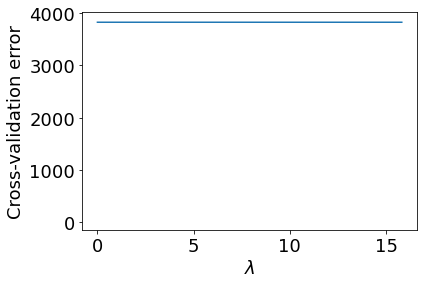

In [132]:
#Visualizing the LOOCV (leave one out cross validatation error vs lambda)
plt.xlabel('xlabel', fontsize=18)
plt.ylabel('ylabel', fontsize=18)
plt.plot(ridgecv.alphas,ridgecv.cv_values_.sum(axis=0))
plt.plot([ridgecv.alpha_,ridgecv.alpha_],[40,40.2],':')
plt.xlabel('$\lambda$')
plt.ylabel('Cross-validation error')

In [133]:
#Test dataset
Xtest = test.loc[:,['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'required_car_parking_space',
       'lead_time', 'arrival_year', 
       'arrival_date', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 
       'Complementary', 'Corporate', 'Offline', 'Online', 'January',
       'February', 'March', 'May', 'June', 'July', 'August', 'September',
       'October', 'November', 'December', 'MealPlan1', 'MealPlan2',
       'NotSelected', 'Room_Type1', 'Room_Type2', 'Room_Type3', 'Room_Type4',
       'Room_Type5', 'Room_Type6']]

#Standardizing test data
Xtest_std = scaler.transform(Xtest)

In [135]:
#Using the developed ridge regression model to predict on test data
ridge = Ridge(alpha = ridgecv.alpha_)
ridge = ridge.fit(Xstd, y)


Classification accuracy = 75.2%
Precision = 74.0%
TPR or Recall = 94.8%
FNR = 5.2%
FPR = 60.5%
ROC-AUC = 87.2%


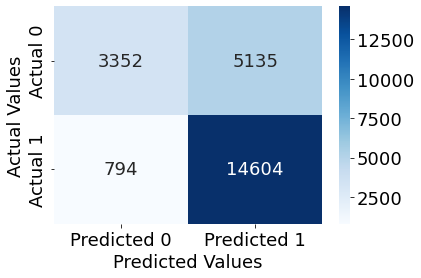

In [136]:
confusion_matrix_data(Xstd, y, ridge, cutoff = 0.4)

Classification accuracy = 74.3%
Precision = 73.0%
TPR or Recall = 94.7%
FNR = 5.3%
FPR = 61.8%
ROC-AUC = 86.2%


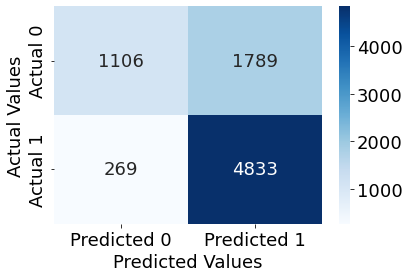

In [138]:
confusion_matrix_data(Xtest_std, test.booking_status, ridge, cutoff = 0.4)

## Lasso

In [139]:
#Creating a range of values of the tuning parameter to visualize the lasso coefficients
#for different values of the tuning parameter
alphas = 10**np.linspace(10,-2,100)*0.1

In [140]:
#Finding the lasso coefficients for increasing values of the tuning parameter
lasso = Lasso(max_iter = 10000)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(Xstd, y)
    coefs.append(lasso.coef_)

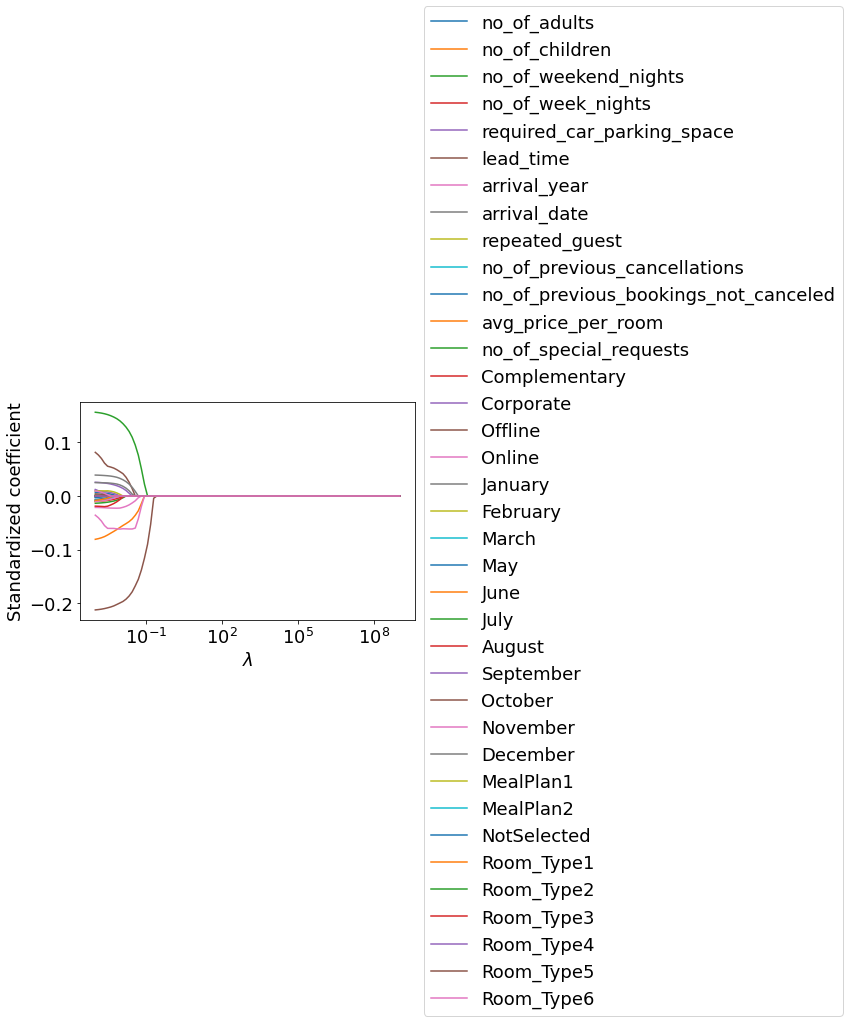

In [142]:
#Visualizing the shrinkage in lasso coefficients with increasing values of the tuning parameter lambda
plt.xlabel('xlabel', fontsize=18)
plt.ylabel('ylabel', fontsize=18)
plt.plot(alphas, coefs)
plt.xscale('log')
plt.xlabel('$\lambda$')
plt.ylabel('Standardized coefficient')
plt.legend(train.columns.drop(['booking_status', 'Booking_ID', 'type_of_meal_plan', 'market_segment_type', 
                               'arrival_month', 'room_type_reserved']), loc='center left', bbox_to_anchor=(1, 0.5));

In [143]:
#Let us use cross validation to find the optimal value of the tuning parameter - lambda
#For the optimal lambda, the cross validation error will be the least

#Note that we are reducing the range of alpha so as to better visualize the minimum
alphas = 10**np.linspace(-1,-5,200)*0.5
lassocv = LassoCV(alphas = alphas, cv = 10, max_iter = 100000)
lassocv.fit(Xstd, y)

#Optimal value of the tuning parameter - lamda
lassocv.alpha_

0.00014665831391950227

Text(0, 0.5, 'Cross-validation error')

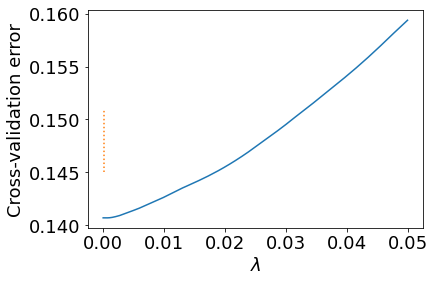

In [144]:
#Visualizing the LOOCV (leave one out cross validatation error vs lambda)
plt.xlabel('xlabel', fontsize=18)
plt.ylabel('ylabel', fontsize=18)
plt.plot(lassocv.alphas_,lassocv.mse_path_.mean(axis=1))
plt.plot([lassocv.alpha_,lassocv.alpha_],[0.145,0.151],':')
plt.xlabel('$\lambda$')
plt.ylabel('Cross-validation error')

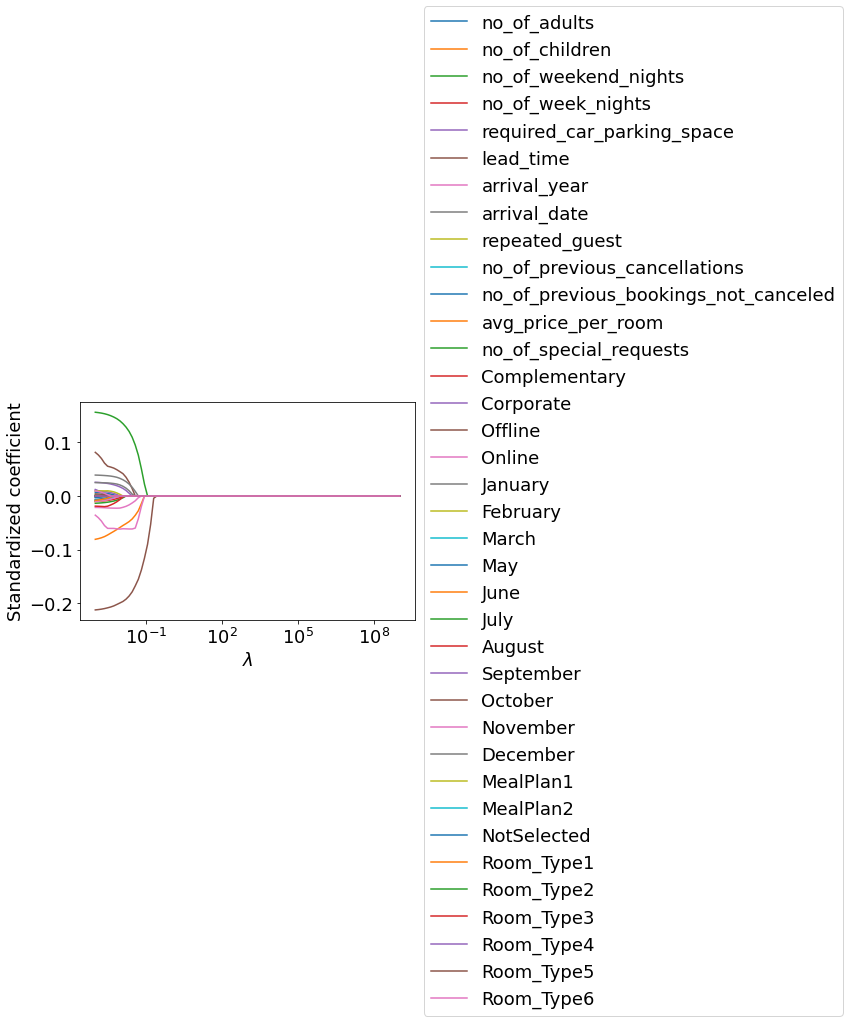

In [145]:
#Visualizing the shrinkage in lasso coefficients with increasing values of the tuning parameter lambda
alphas = 10**np.linspace(10,-2,100)*0.1
plt.xlabel('xlabel', fontsize=18)
plt.ylabel('ylabel', fontsize=18)
plt.plot(alphas, coefs)
plt.xscale('log')
plt.xlabel('$\lambda$')
plt.ylabel('Standardized coefficient')
plt.legend(train.columns.drop(['booking_status', 'Booking_ID', 'type_of_meal_plan', 'market_segment_type', 
                               'arrival_month', 'room_type_reserved']), loc='center left', bbox_to_anchor=(1, 0.5));

In [146]:
#Using the developed lasso model to predict on test data
lasso = Lasso(alpha = lassocv.alpha_)
lasso = lasso.fit(Xstd, y)

Classification accuracy = 75.2%
Precision = 74.0%
TPR or Recall = 94.9%
FNR = 5.1%
FPR = 60.5%
ROC-AUC = 87.2%


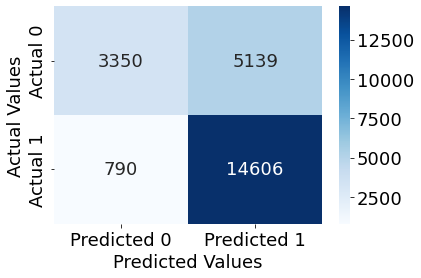

In [147]:
confusion_matrix_data(Xstd, y, lasso, cutoff = 0.4)

Classification accuracy = 74.2%
Precision = 73.0%
TPR or Recall = 94.7%
FNR = 5.3%
FPR = 61.8%
ROC-AUC = 86.2%


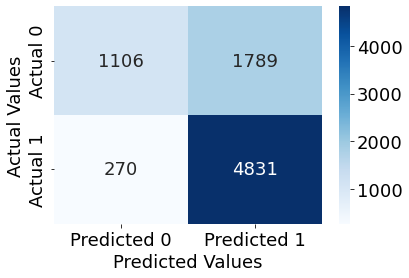

In [150]:
confusion_matrix_data(Xtest_std, test.booking_status, lasso, cutoff = 0.4)